# HW3 - Locke Patton

In [2]:
import numpy as np
from scipy import integrate
from scipy.integrate import odeint
import scipy.special as special
import astropy.units as u
import matplotlib.pyplot as plt
import warnings
from __future__ import division
import os
%matplotlib inline
# warnings.filterwarnings('ignore')

## Problem 1

#### Show how we get the 3rd of the Friedman equations from the first two.
We assume the following:

EQ 1:
$$\frac{\ddot{a}(x)}{a(x)} = \frac{-4\pi G}{3c^2}[\epsilon(t)+3P(t)]$$

EQ 2:
$$\big(\frac{\dot{a}(x)}{a(x)}\big)^2 = \frac{8\pi G \epsilon(t)}{3c^2}-\frac{kc^2}{a(t)^2}$$

First, we take the derivative of equation 2 with respect to time:

$$\frac{d}{dt}\big(\frac{\dot{a}(x)}{a(x)}\big)^2 
= \frac{d}{dt}\big(\frac{8\pi G \epsilon(t)}{3c^2}-\frac{kc^2}{a(t)^2}\big)$$

$$2\big(\frac{\dot{a}(x)}{a(x)}\big)\big(\frac{\ddot{a}(x)}{a(x)}-\frac{\dot{a}(x)}{a(x)^2}\dot{a}(x))
= (\frac{8\pi G \dot{\epsilon(t)}}{3c^2}-\frac{2 k c^2}{a(t)^3}\dot{a}(x))$$

Plugging in equation 1 for $\frac{\ddot{a}(x)}{a(x)}$ and cancelling the factors of 2 while combining objects with $\frac{\dot{a}(x)}{a(x)}$ to the left side:

$$ \Big[\frac{-4\pi G}{3c^2}[\epsilon(t)+3P(t)] - \big(\frac{\dot{a}(x)}{a(x)}\big)^2\Big] \frac{\dot{a}(x)}{a(x)}
= \frac{4\pi G}{3c^2}\dot{\epsilon(t)} + \frac{kc^2}{a(t)^3}\dot{a}(x)$$

Rearraning:

$$ \frac{-4\pi G}{3c^2} \Big[\frac{\dot{a}(x)}{a(x)} [\epsilon(t)+3P(t)] + \dot{\epsilon(t)}\Big] 
= \frac{kc^2}{a(t)^3}\dot{a}(x)+ \big(\frac{\dot{a}(x)}{a(x)}\big)^3 $$

But from equation 2, we can plug in $\big(\frac{\dot{a}(x)}{a(x)}\big)^2 $ to the right-most term. So the left side of this equation becomes:

$$ \frac{kc^2}{a(t)^3}\dot{a}(x)+ \frac{\dot{a}(x)}{a(x)} \big( \frac{8\pi G \epsilon(t)}{3c^2}-\frac{kc^2}{a(t)^2} \big) $$

$$  \frac{\dot{a}(x)}{a(x)} \big( \frac{8\pi G \epsilon(t)}{3c^2}\big) + \frac{kc^2 \dot{a}(x)}{a(t)^3} - \frac{kc^2 \dot{a}(x)}{a(t)^3} $$

$$  \big( \frac{4\pi G}{3c^2}\big) \frac{\dot{a}(x)}{a(x)}\big[2 \epsilon(t)\big] $$

Plugging this in, we see:

$$ \frac{-4\pi G}{3c^2} \Big[\frac{\dot{a}(x)}{a(x)} [\epsilon(t)+3P(t)] + \dot{\epsilon(t)}\Big] 
= \big( \frac{4\pi G}{3c^2}\big) \frac{\dot{a}(x)}{a(x)}\big[2 \epsilon(t)\big] $$

And finally:

$$  \Big[\frac{\dot{a}(x)}{a(x)} [\epsilon(t)+3P(t)] + \dot{\epsilon(t)}\Big] 
= \frac{\dot{a}(x)}{a(x)}\big[2 \epsilon(t)\big] $$

$$  \frac{\dot{a}(x)}{a(x)} \big[3\epsilon(t)+3P(t)\big] + \dot{\epsilon(t)} = 0 $$

## Problem 2


##### Using your understanding of how to integrate (from the second homework) write a program that integrates the Friedman equation,

$$ \Big( \frac{H(z)}{H_o} \Big)^2 = \big( \Omega_{r,o} (1+z)^4 + \Omega_{m,o} (1+z)^3 + \Omega_{\Gamma,o} + (1- \Omega_o) (1+z)^4  \big) $$

##### Using this program calculate and plot (a) the comoving distance from z=0 to 10 (b) the age of the universe (at a given redshift) from z=0 to z=10. Calculate these results for the two universes given below
(a) a flat universe with Ωm,0 = 0.3, Ωr,0=0., ΩΛ,0=0.7

(b) a closed universe with Ωm,0 = 10., Ωr,0=0.0, and ΩΛ = 0

Note: to calculate the age of the universe remember that H(z) is directly related to dz/dt . Use H0=70 km s-1 Mpc-1 in your calculations and plot the age in Gyr.

In [3]:
Ho_Current = 70 * u.km / (u.Mpc * u.s)
i = ['Value for Ho used:',Ho_Current,Ho_Current.decompose()]
for l in enumerate(i):
    print l[1]

Value for Ho used:
70.0 km / (Mpc s)
2.26854550263e-18 1 / s


$$r(z) = \int_0^z \frac{c \, dz}{H(z)}$$
<center>where</center>
$$ H(z) = H_o \Big( \Omega_{r,o} (1+z)^4 + \Omega_{m,o} (1+z)^3 + \Omega_{\Gamma,o} + (1- \Omega_o) (1+z)^4  \Big)^\frac{1}{2} $$

$$r(z) = \int_0^z \frac{c \, dz}{H_o( \Omega_{r,o} (1+z)^4 + \Omega_{m,o} (1+z)^3 + \Omega_{\Lambda,o} + (1- \Omega_o) (1+z)^4 )^\frac{1}{2}}$$

To calculate lookback time:

$$a = \frac{1}{1+z}$$

$$z = \frac{1}{a}-1$$

$$\frac{dz}{dt} = -\frac{\dot{a(z)}}{a(z)^2} $$

$$\frac{dz}{dt} = -\frac{H(t)}{a(z)} $$

$$dz = -H(t)(1+z)dt $$

$$t(z) = \int_0^z \frac{dz}{H(z)(1+z)} $$

$$t(z) = \int_0^z \frac{dz}{H_o(1+z)( \Omega_{r,o} (1+z)^4 + \Omega_{m,o} (1+z)^3 + \Omega_{\Lambda,o} + (1- \Omega_o) (1+z)^4 )^\frac{1}{2}}$$

In [4]:
omega_uni_1=[0.3,0.0,0.7]
omega_uni_2=[10.0,0.0,0.0]

c = 3 * 10**8 * u.m/u.s
Const = (c/Ho_Current).to(u.Mpc).value

def comovingcoord(z,omegas):
    omega_m0, omega_r0, omega_l0 = omegas
    omega_0 = sum(omegas)
    return  Const / (omega_r0*(1+z)**4 + omega_m0*(1+z)**3 + omega_l0 + (1-omega_0)*(1+z)**2 )**.5

def time(z,omegas):
    omega_m0, omega_r0, omega_l0 = omegas
    omega_0 = sum(omegas)
    return  1 /(Ho_Current.to(1/u.s).value*(1+z)*(omega_r0*(1+z)**4 + omega_m0*(1+z)**3 + omega_l0 + (1-omega_0)*(1+z)**2 )**.5) 

In [28]:
Universe = {}
Universe['z']=[]
Universe['1']={}
Universe['2']={}
Universe['1']['r']=[]
Universe['2']['r']=[]
Universe['1']['t']=[]
Universe['2']['t']=[]

n_points = 100
for i in range(n_points):
    Universe['z'].append(i)
    Universe['1']['r'].append(integrate.quad(comovingcoord, 0, i,args=(omega_uni_1,))[0])
    Universe['2']['r'].append(integrate.quad(comovingcoord, 0, i,args=(omega_uni_2,))[0])
    Universe['1']['t'].append(integrate.quad(time, 0, i, args=(omega_uni_1,))[0])
    Universe['2']['t'].append(integrate.quad(time, 0, i, args=(omega_uni_2,))[0])
    
t_universe_1 = integrate.quad(time, 0, 10000, args=(omega_uni_1,))[0] * u.s
t_universe_2 = integrate.quad(time, 0, 10000, args=(omega_uni_2,))[0] * u.s

print 'Universe 1',t_universe_1.to(u.Gyr)
print 'Universe 2',t_universe_2.to(u.Gyr)

Universe 1 13.4669669476 Gyr
Universe 2 4.90988898287 Gyr


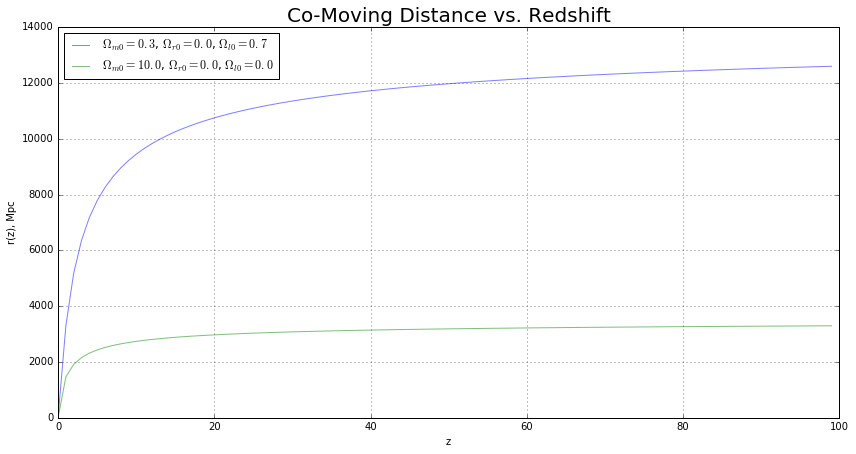

In [29]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(14,7)

alpha=.5
ax.plot(Universe['z'],Universe['1']['r'],marker='',c='b',linestyle='-',alpha=alpha,label='$\Omega_{m0} = 0.3$, $\Omega_{r0}=0.0$, $\Omega_{l0}=0.7$');
ax.plot(Universe['z'],Universe['2']['r'],marker='',c='g',linestyle='-',alpha=alpha,label='$\Omega_{m0} = 10.0$, $\Omega_{r0}=0.0$, $\Omega_{l0}=0.0$');

ax.set_title('Co-Moving Distance vs. Redshift',fontsize=20)
ax.set_xlabel('z')
ax.set_ylabel('r(z), Mpc')

ax.grid()
ax.legend(loc=2);

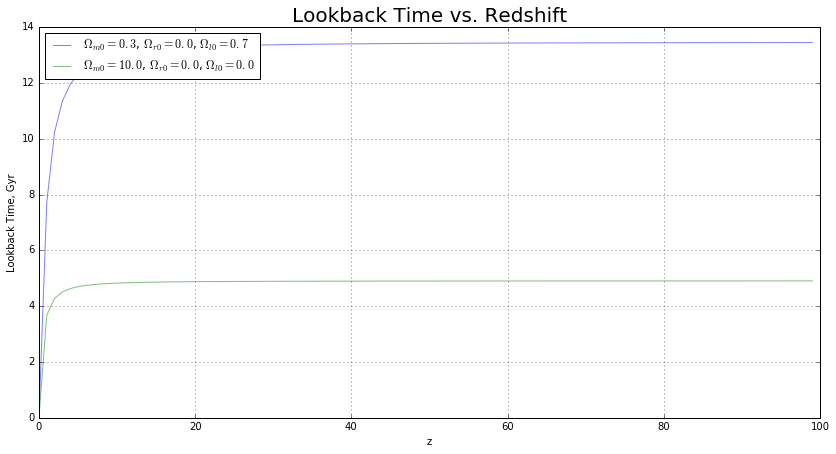

In [30]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(14,7)

alpha=.5

ax.plot(Universe['z'],(Universe['1']['t']*u.s).to(u.Gyr),marker='',c='b',linestyle='-',alpha=alpha,label='$\Omega_{m0} = 0.3$, $\Omega_{r0}=0.0$, $\Omega_{l0}=0.7$');
ax.plot(Universe['z'],(Universe['2']['t']*u.s).to(u.Gyr),marker='',c='g',linestyle='-',alpha=alpha,label='$\Omega_{m0} = 10.0$, $\Omega_{r0}=0.0$, $\Omega_{l0}=0.0$');

ax.set_title('Lookback Time vs. Redshift',fontsize=20)
ax.set_xlabel('z')
ax.set_ylabel('Lookback Time, Gyr')

ax.grid()
ax.legend(loc=2);

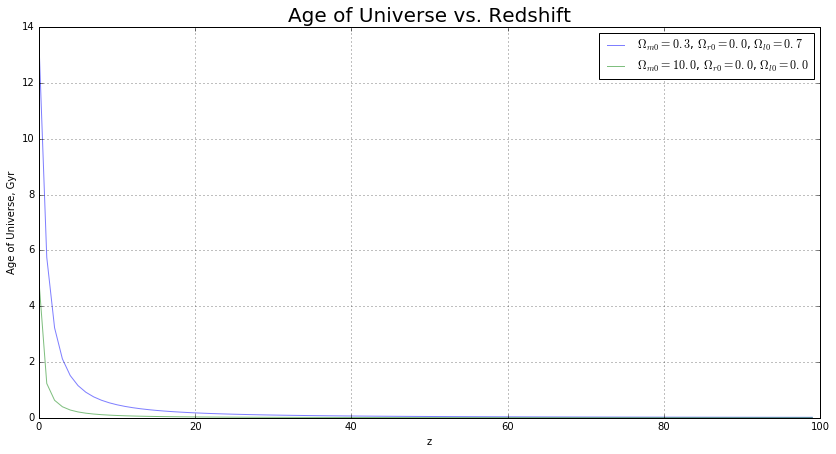

In [31]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(14,7)

alpha=.5

ax.plot(Universe['z'],t_universe_1.to(u.Gyr)-(Universe['1']['t']*u.s).to(u.Gyr),marker='',c='b',linestyle='-',alpha=alpha,label='$\Omega_{m0} = 0.3$, $\Omega_{r0}=0.0$, $\Omega_{l0}=0.7$');
ax.plot(Universe['z'],t_universe_2.to(u.Gyr)-(Universe['2']['t']*u.s).to(u.Gyr),marker='',c='g',linestyle='-',alpha=alpha,label='$\Omega_{m0} = 10.0$, $\Omega_{r0}=0.0$, $\Omega_{l0}=0.0$');

ax.set_title('Age of Universe vs. Redshift',fontsize=20)
ax.set_xlabel('z')
ax.set_ylabel('Age of Universe, Gyr')

ax.grid()
ax.legend(loc=1);

## Problem 3


##### Use the program to find the value of Ωr for a radiation only open universe (no cosmological constant) that would give the same age of the universe (for the current day) as our benchmark flat universe with $\Omega_{m,o} = .3$, and $\Omega_{\Lambda,o} = 0.7$.

The age of the Universe in Benchmark Flat Universe with $\Omega_{m,o} = .3$, and $\Omega_{\Lambda,o} = 0.7$ was found before:

In [12]:
t_universe_1.to(u.Gyr)

<Quantity 13.46696694763799 Gyr>

Iternating over possible Omegra r values:

In [13]:
omega_r = np.linspace(3,5,1000)

for i in omega_r:
    omega_new=[0,i,1]
    t_lookback = integrate.quad(time, 0, 100, args=(omega_new,))[0] 
    diff = (t_lookback*u.s).to(u.Gyr) - t_universe_2.to(u.Gyr)
    if (diff < 10**-3*u.Gyr) == True:
        print 'Omega r is %s within %s.'%(i, diff)
        break

Omega r is 3.84484484484 within 0.000278840765135 Gyr.


In [ ]:
!say "Thanks, Professor Connolly."